In [1]:
#Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import pandas as pd
import datetime
import scipy.optimize as optimize

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
def capm(startDate,endDate,ticker1, ticker2):
    
    risk_free_rate = 0.05
    # time frame for calcuating returns
    month = 12
    daily = 252 
    
    # get stock data from yahoo
    stock1 = web.get_data_yahoo(ticker1, startDate, endDate)
    stock2 = web.get_data_yahoo(ticker2, startDate, endDate)
    
    # we prefer monthly returns instead of daily returns
    return_stock1 = stock1.resample('M').last()
    return_stock2 = stock2.resample('M').last()
    
    # create a dataframe from thae data - adjusted close price is usually used
    data = pd.DataFrame({'s_adjclose':return_stock1['Adj Close'], 'm_adjclose':return_stock2['Adj Close']}, index=return_stock1.index)
    
    # use natural logarithm of the returns
    data[['s_returns','m_returns']] = np.log(data[['s_adjclose','m_adjclose']]/data[['s_adjclose','m_adjclose']].shift(1))
    
    # no need for NaN/missing values
    data = data.dropna()
    
    # Covariance Matrix: the diagonal items are the variances - off diagonals are the covariance
    # The matrix is symmetric: cov[0,1] = cov[1,0]
    covmat = np.cov(data["s_returns"],data["m_returns"])
    print(covmat)
    
    # calculate beta using covarience
    beta = covmat[0,1]/covmat[1,1]
    print("Beta from formula:",beta)
    
    # Use linear Regression to fit a line to the data [Stock_Returns, market_returns] - slope is the beta
    beta,alpha = np.polyfit(data['m_returns'],data["s_returns"],deg=1)
    print("Beta from regression:", beta)
    
    # plot
    fig,axis = plt.subplots(1,figsize=(20,10))
    axis.scatter(data["m_returns"],data["s_returns"], label="Data Points")
    axis.plot(data["m_returns"],beta*data["m_returns"] + alpha, color='red', label="CAPM Line")
    plt.title('Capital Asset Pricing Model, finding alphas and betas')
    plt.xlabel('Makert return $R_m$', fontsize=18)
    plt.ylabel('Stock return $R_a$')
    plt.text(0.08,0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=18)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # calculate the expected return acording to the CAPM formula 
    expected_return = risk_free_rate + beta*(data['m_returns'].mean()*month-risk_free_rate)
    print("Expected return:",expected_return)

[[0.00323082 0.00121797]
 [0.00121797 0.00128235]]
Beta from formula: 0.949797839267122
Beta from regression: 0.9497978392671219


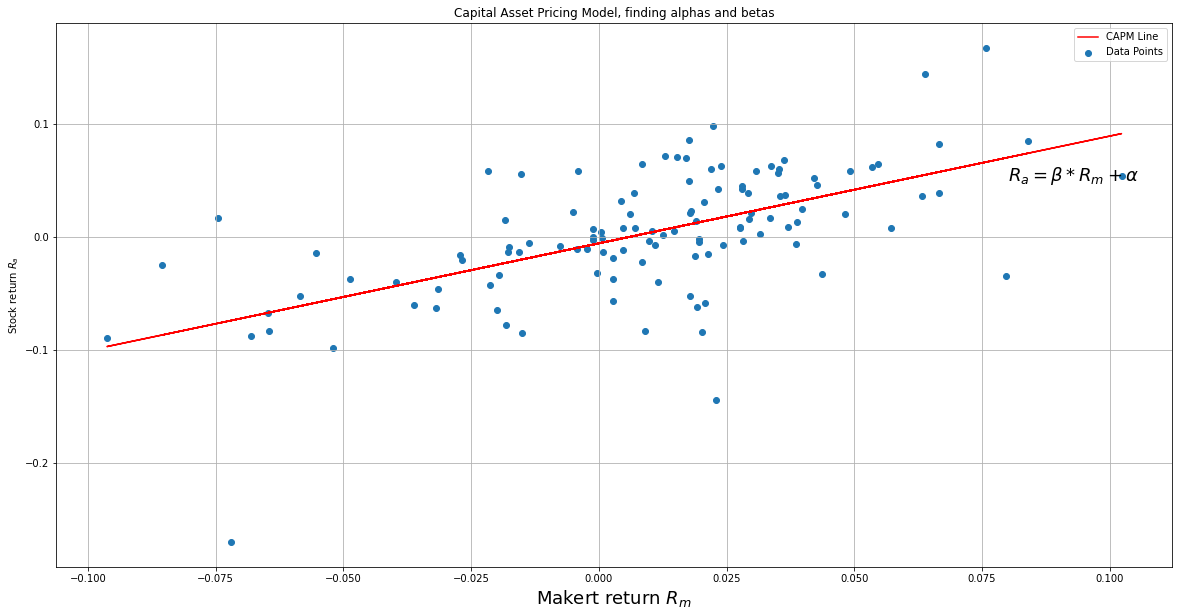

Expected return: 0.10800515924955087


In [9]:
if __name__ == "__main__":
    # using historical data 2010-2017: the market is the S&P500
    capm('2010-01-01','2020-01-01','IBM','^GSPC')